In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

ModuleNotFoundError: No module named 'pandas'

In [7]:
db = pd.read_csv('machine_learning/python/casas_preco_eda.csv')

db = db.drop(columns=['titulo', 'descriçao', 'casas'])
    
print(db.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   local      151 non-null    object
 1   preco      151 non-null    int64 
 2   bairro     151 non-null    object
 3   cidade     151 non-null    object
 4   atributos  151 non-null    object
 5   quartos    151 non-null    int64 
 6   banheiro   151 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.4+ KB
None


In [8]:
x = db[['quartos', 'banheiro']]
y = db['preco']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

modelos = LinearRegression()
modelos.fit(x_treino, y_treino)

y_pred = modelos.predict(x_teste)

mae = mean_absolute_error(y_teste, y_pred)
rmse = np.sqrt(mean_squared_error(y_teste, y_pred))

In [9]:
print()
print()

print("<<<======RESULTADOS=======>>>")
print()
print(f'mae: {mae:.2f}')
print()
print(f'rmse: {rmse:.2f}')
print("<<<========================>>>")




<<<======RESULTADOS=======>>>

mae: 311882.62

rmse: 392282.13
<<<========================>>>


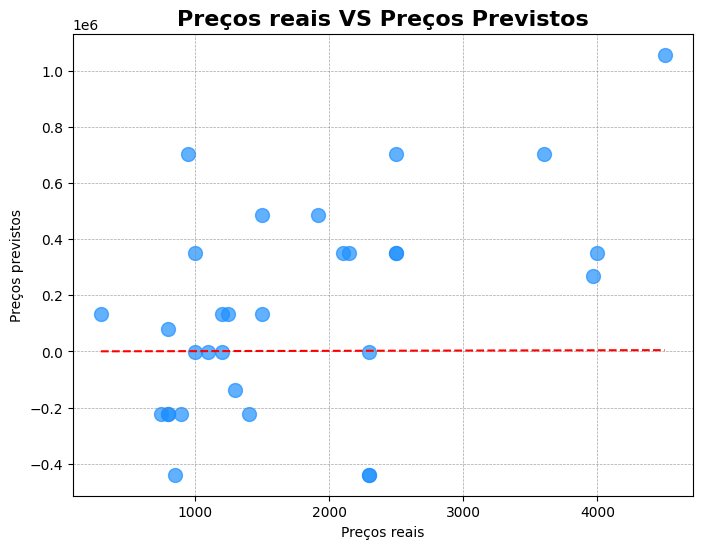

In [10]:
mp.figure(figsize=(8, 6))

mp.scatter(y_teste, y_pred, color='dodgerblue', label='Previsões', alpha=0.7, s=100)

mp.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

linha_referencia = np.linspace(min(y_teste), max(y_teste), 100)

mp.plot(linha_referencia, linha_referencia, color='red', linestyle='--', label='Linha de Perfeição')

mp.xlabel('Preços reais')

mp.ylabel('Preços previstos')

mp.title('Preços reais VS Preços Previstos', fontsize=16, fontweight='bold')

mp.show()

In [ ]:
%pip install pandas